In [1]:


import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.integrate import solve_ivp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [2]:
from NeuronModel.fitzhughNagumo_model import fitzhughNagumo_model
from NeuronModel.GRUNetwork import GRUNetwork
from NeuronModel.HybridModel import HybridModel
from NeuronModel.IzhikevichModel import izhikevich_model



Dati di banchmark articolo [1]:


In [3]:
N = 20  # Number of oscillators
epsilon = 0.05
sigma = 0.1  # Coupling strength
a = 0.5  # Threshold parameter
phi = np.pi / 2 + 0.1

    # Coupling matrix B
B = np.array([[np.cos(phi), np.sin(phi)],
                  [-np.sin(phi), np.cos(phi)]])

    # Define adjacency matrix A1
A1 = np.array([
        [5.25677, 3.22776, 0.02343, 1.00899, 0.86886],
        [3.22776, 4.77906, 0.71110, 1.58785, 0.68990],
        [0.02343, 0.71110, 5.39732, 1.27769, 1.03968],
        [1.00899, 1.58785, 1.27769, 3.83577, 1.92157],
        [0.86886, 0.68990, 1.03968, 1.92157, 4.69323]
    ])

# Calculate adjacency matrix G using Kronecker product
n = 3
G = A1.copy()
for _ in range(n - 1):
      G = np.kron(G, A1)

    # Remove self-loops and normalize weights
np.fill_diagonal(G, 0)
G = G / np.mean(G[G > 0])




In [5]:
hybrid_model = HybridModel()
fn_model = fitzhughNagumo_model(N, epsilon,sigma, a, B, G)

t,sol = fn_model._generate_synthetic_data()



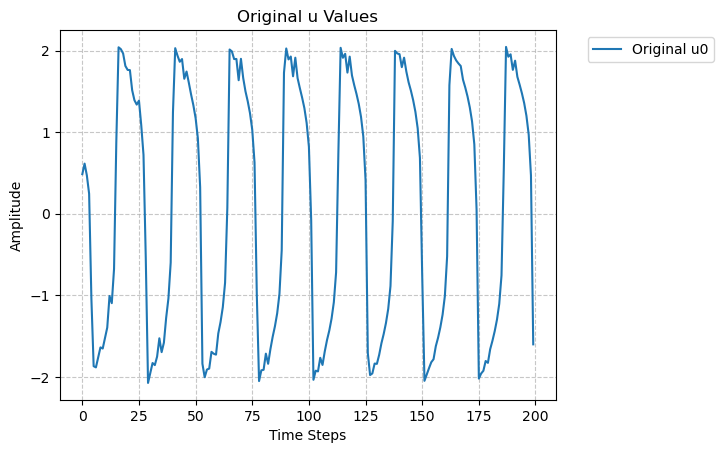

In [6]:
for i in range(1):  # Limit to 5 neurons for readability
        plt.plot(sol[:200,i], label=f'Original u{i}')
       
plt.title('Original u Values')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

In [7]:

x,y = hybrid_model._prepare_data(sol)
x_train, y_train, x_test, y_test = hybrid_model._split_train_test(x,y)

In [12]:

model = hybrid_model._create_gru(len(sol[1]),len(sol[1]), same_size = True)

optimizer = optim.Adam(model.parameters(), lr=0.01)

trained_model = hybrid_model._train(model,x_train,y_train,optimizer,epochs = 200 )



Epoch [20/200], Train Loss: 0.0686 
Epoch [40/200], Train Loss: 0.0310 
Epoch [60/200], Train Loss: 0.0202 
Epoch [80/200], Train Loss: 0.0144 
Epoch [100/200], Train Loss: 0.0108 
Epoch [120/200], Train Loss: 0.0088 
Epoch [140/200], Train Loss: 0.0075 
Epoch [160/200], Train Loss: 0.0064 
Epoch [180/200], Train Loss: 0.0055 
Epoch [200/200], Train Loss: 0.0048 


In [13]:
forecasted = hybrid_model._forecast(trained_model, x_test, y_test)

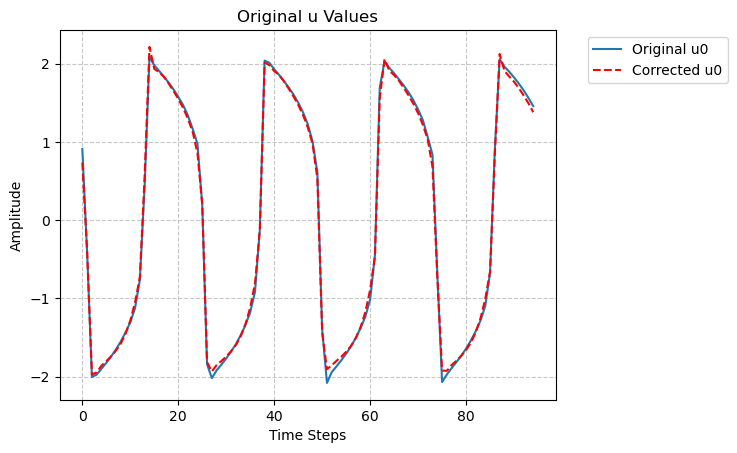

In [14]:
#sol = hybrid_model._standardize(sol)
for i in range(1):  # Limit to 5 neurons for readability
        plt.plot(y_test[:200, 3], label=f'Original u{i}')
        plt.plot(forecasted[:200,3], label=f'Corrected u{i}', color='red', linestyle='dashed')
plt.title('Original u Values')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

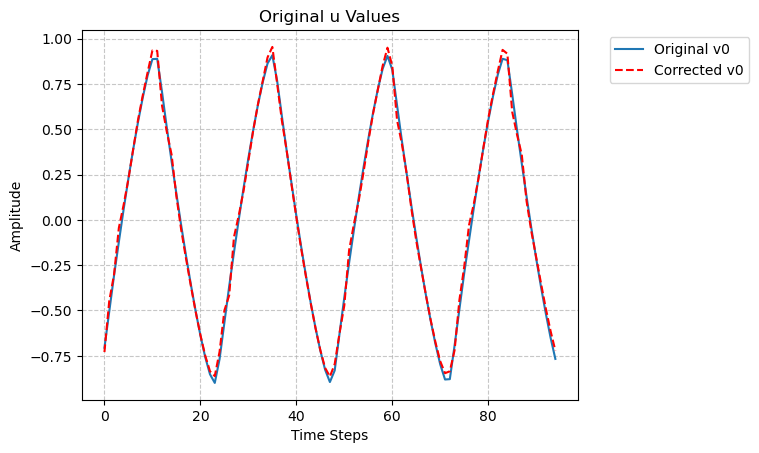

In [15]:

for i in range(1):  # Limit to 5 neurons for readability
        plt.plot(y_test[:196, 39], label=f'Original v{i}')
        plt.plot(forecasted[:196,39], label=f'Corrected v{i}', color='red', linestyle='dashed')
plt.title('Original u Values')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)


In [16]:
x_error, y_error = hybrid_model.create_error_sequences(model_data = sol , true_data = sol)

model_corrections = hybrid_model._create_gru(len(sol[1]),len(sol[1]), same_size = True)

optimizer = optim.Adam(model_corrections.parameters(), lr=0.001)

trained_model_corrections = hybrid_model._train(model_corrections,x_error,y_error,optimizer,epochs = 200 )




Epoch [20/200], Train Loss: 0.0002 
Epoch [40/200], Train Loss: 0.0000 
Epoch [60/200], Train Loss: 0.0000 
Epoch [80/200], Train Loss: 0.0000 
Epoch [100/200], Train Loss: 0.0000 
Epoch [120/200], Train Loss: 0.0000 
Epoch [140/200], Train Loss: 0.0000 
Epoch [160/200], Train Loss: 0.0000 
Epoch [180/200], Train Loss: 0.0000 
Epoch [200/200], Train Loss: 0.0000 


In [17]:
forecast = hybrid_model._forecast(trained_model_corrections, x_test, y_test, corrections=True)

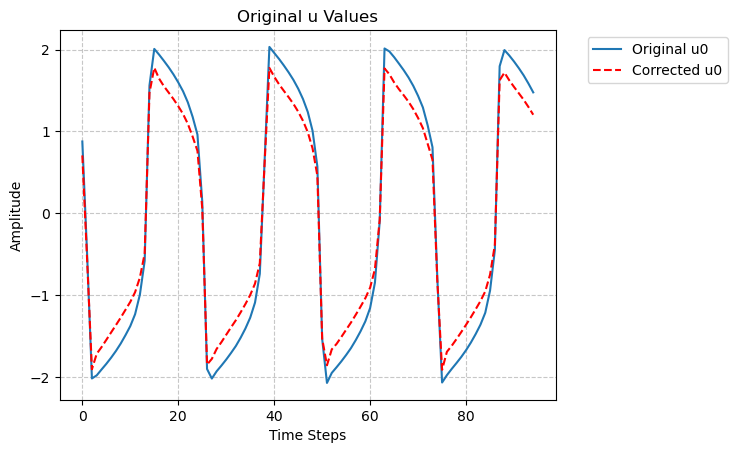

In [18]:


for i in range(1):  # Limit to 5 neurons for readability
        plt.plot(y_test[:200, 2], label=f'Original u{i}')
        plt.plot(forecast[:200,2], label=f'Corrected u{i}', color='red', linestyle='dashed')
plt.title('Original u Values')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

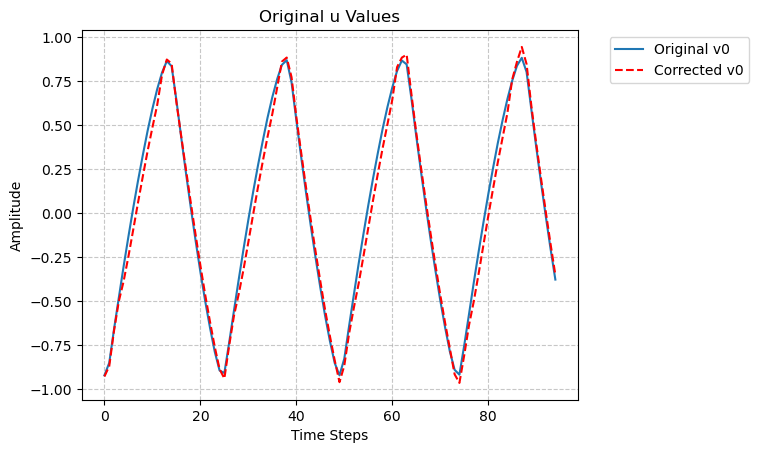

In [19]:
for i in range(1):  # Limit to 5 neurons for readability
        plt.plot(y_test[:200, 26], label=f'Original v{i}')
        plt.plot(forecast[:200,26], label=f'Corrected v{i}', color='red', linestyle='dashed')
plt.title('Original u Values')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

PEZZO DA CONTROLLARE + classe IZHIKEVIC

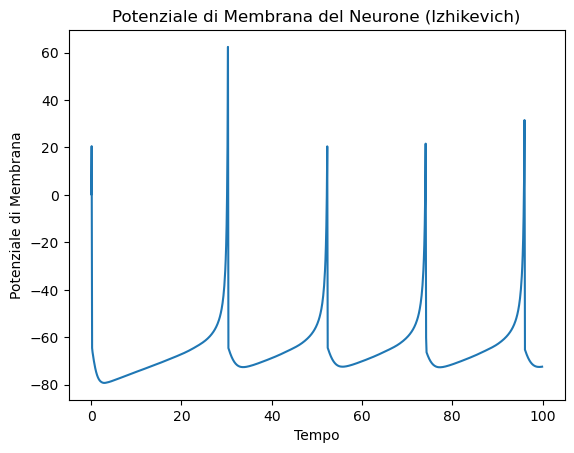

In [28]:


izh_model = izhikevich_model(N=20, a=0.05, b=0.2, c=-65, d=8, I=10)
t, data = izh_model._generate_synthetic_data(T=100, dt=0.1)
hybrid_model = HybridModel()

plt.plot(t, data[:, 1])  
plt.title("Potenziale di Membrana del Neurone (Izhikevich)")
plt.xlabel("Tempo")
plt.ylabel("Potenziale di Membrana")
plt.show()

In [30]:

x,y = hybrid_model._prepare_data(data)
x_train, y_train, x_test, y_test = hybrid_model._split_train_test(x,y)

In [44]:
model = hybrid_model._create_gru(len(data[1]),len(data[1]), same_size = True)

optimizer = optim.Adam(model.parameters(), lr=0.1)

trained_model = hybrid_model._train(model,x_train,y_train,optimizer,epochs = 1000 )

Epoch [20/1000], Train Loss: 71.1221 
Epoch [40/1000], Train Loss: 77.4745 
Epoch [60/1000], Train Loss: 69.9844 
Epoch [80/1000], Train Loss: 67.9525 
Epoch [100/1000], Train Loss: 66.1560 
Epoch [120/1000], Train Loss: 64.6790 
Epoch [140/1000], Train Loss: 63.2730 
Epoch [160/1000], Train Loss: 63.0206 


KeyboardInterrupt: 

In [45]:
forecasted = hybrid_model._forecast(trained_model, x_test, y_test)

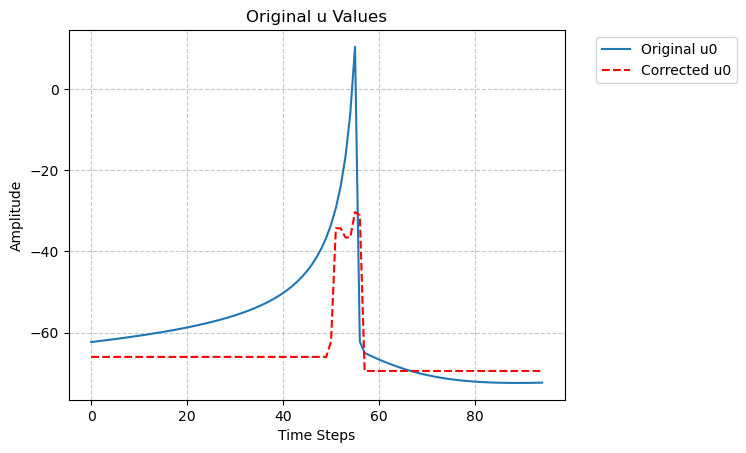

In [46]:
#sol = hybrid_model._standardize(sol)
for i in range(1):  # Limit to 5 neurons for readability
        plt.plot(y_test[:, 5], label=f'Original u{i}')
        plt.plot(forecasted[:,5], label=f'Corrected u{i}', color='red', linestyle='dashed')
plt.title('Original u Values')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)